This notebook walks through our data processing steps

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('kc_house_data.csv')

# EDA

In [4]:
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

In [5]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  19221.000000  21534.000000  21597.000000   
mean   1.509941e+04      1.494096      0.007596      0.233863      3.409825   
std    4.141264e+04      0.539683      0.086825      0.765686      0.650546   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068500e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above      yr_built  yr_renovated       zipcode  \
count  21597.000000  21597.000000  21597.000000  17755.000000  21597.000000   
mean       7.657915   1788.596842   1970.999676     83.636778  98077.951845   
std        1.173200    827.759761     29.375234    399.946414     53.513072   
min        3.000000    370.000000   1900.000000      0.000000  98001.000000   
25%        7.000000   1190.000000   1951.000000      0.000000  98033.000000   
50%        7.000000   1560.000000   1975.000000      0.000000  98065.000000   
75%        8.000000   2210.000000   1997.000000      0.000000  98118.000000   
max       13.000000   9410.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000   21597.000000   21597.000000  
mean      47.560093   -122.213982    1986.620318   12758.283512  
std        0.138552      0.140724     685.230472   27274.441950  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471100   -122.328000    1490.000000    5100.000000  
50%       47.571800   -122.231000    1840.000000    7620.000000  
75%       47.678000   -122.125000    2360.000000   10083.000000  
max       47.777600   -121.315000    6210.000000  871200.000000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


Checking the distributions of the plot

C:\Users\anupj\Anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\anupj\Anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


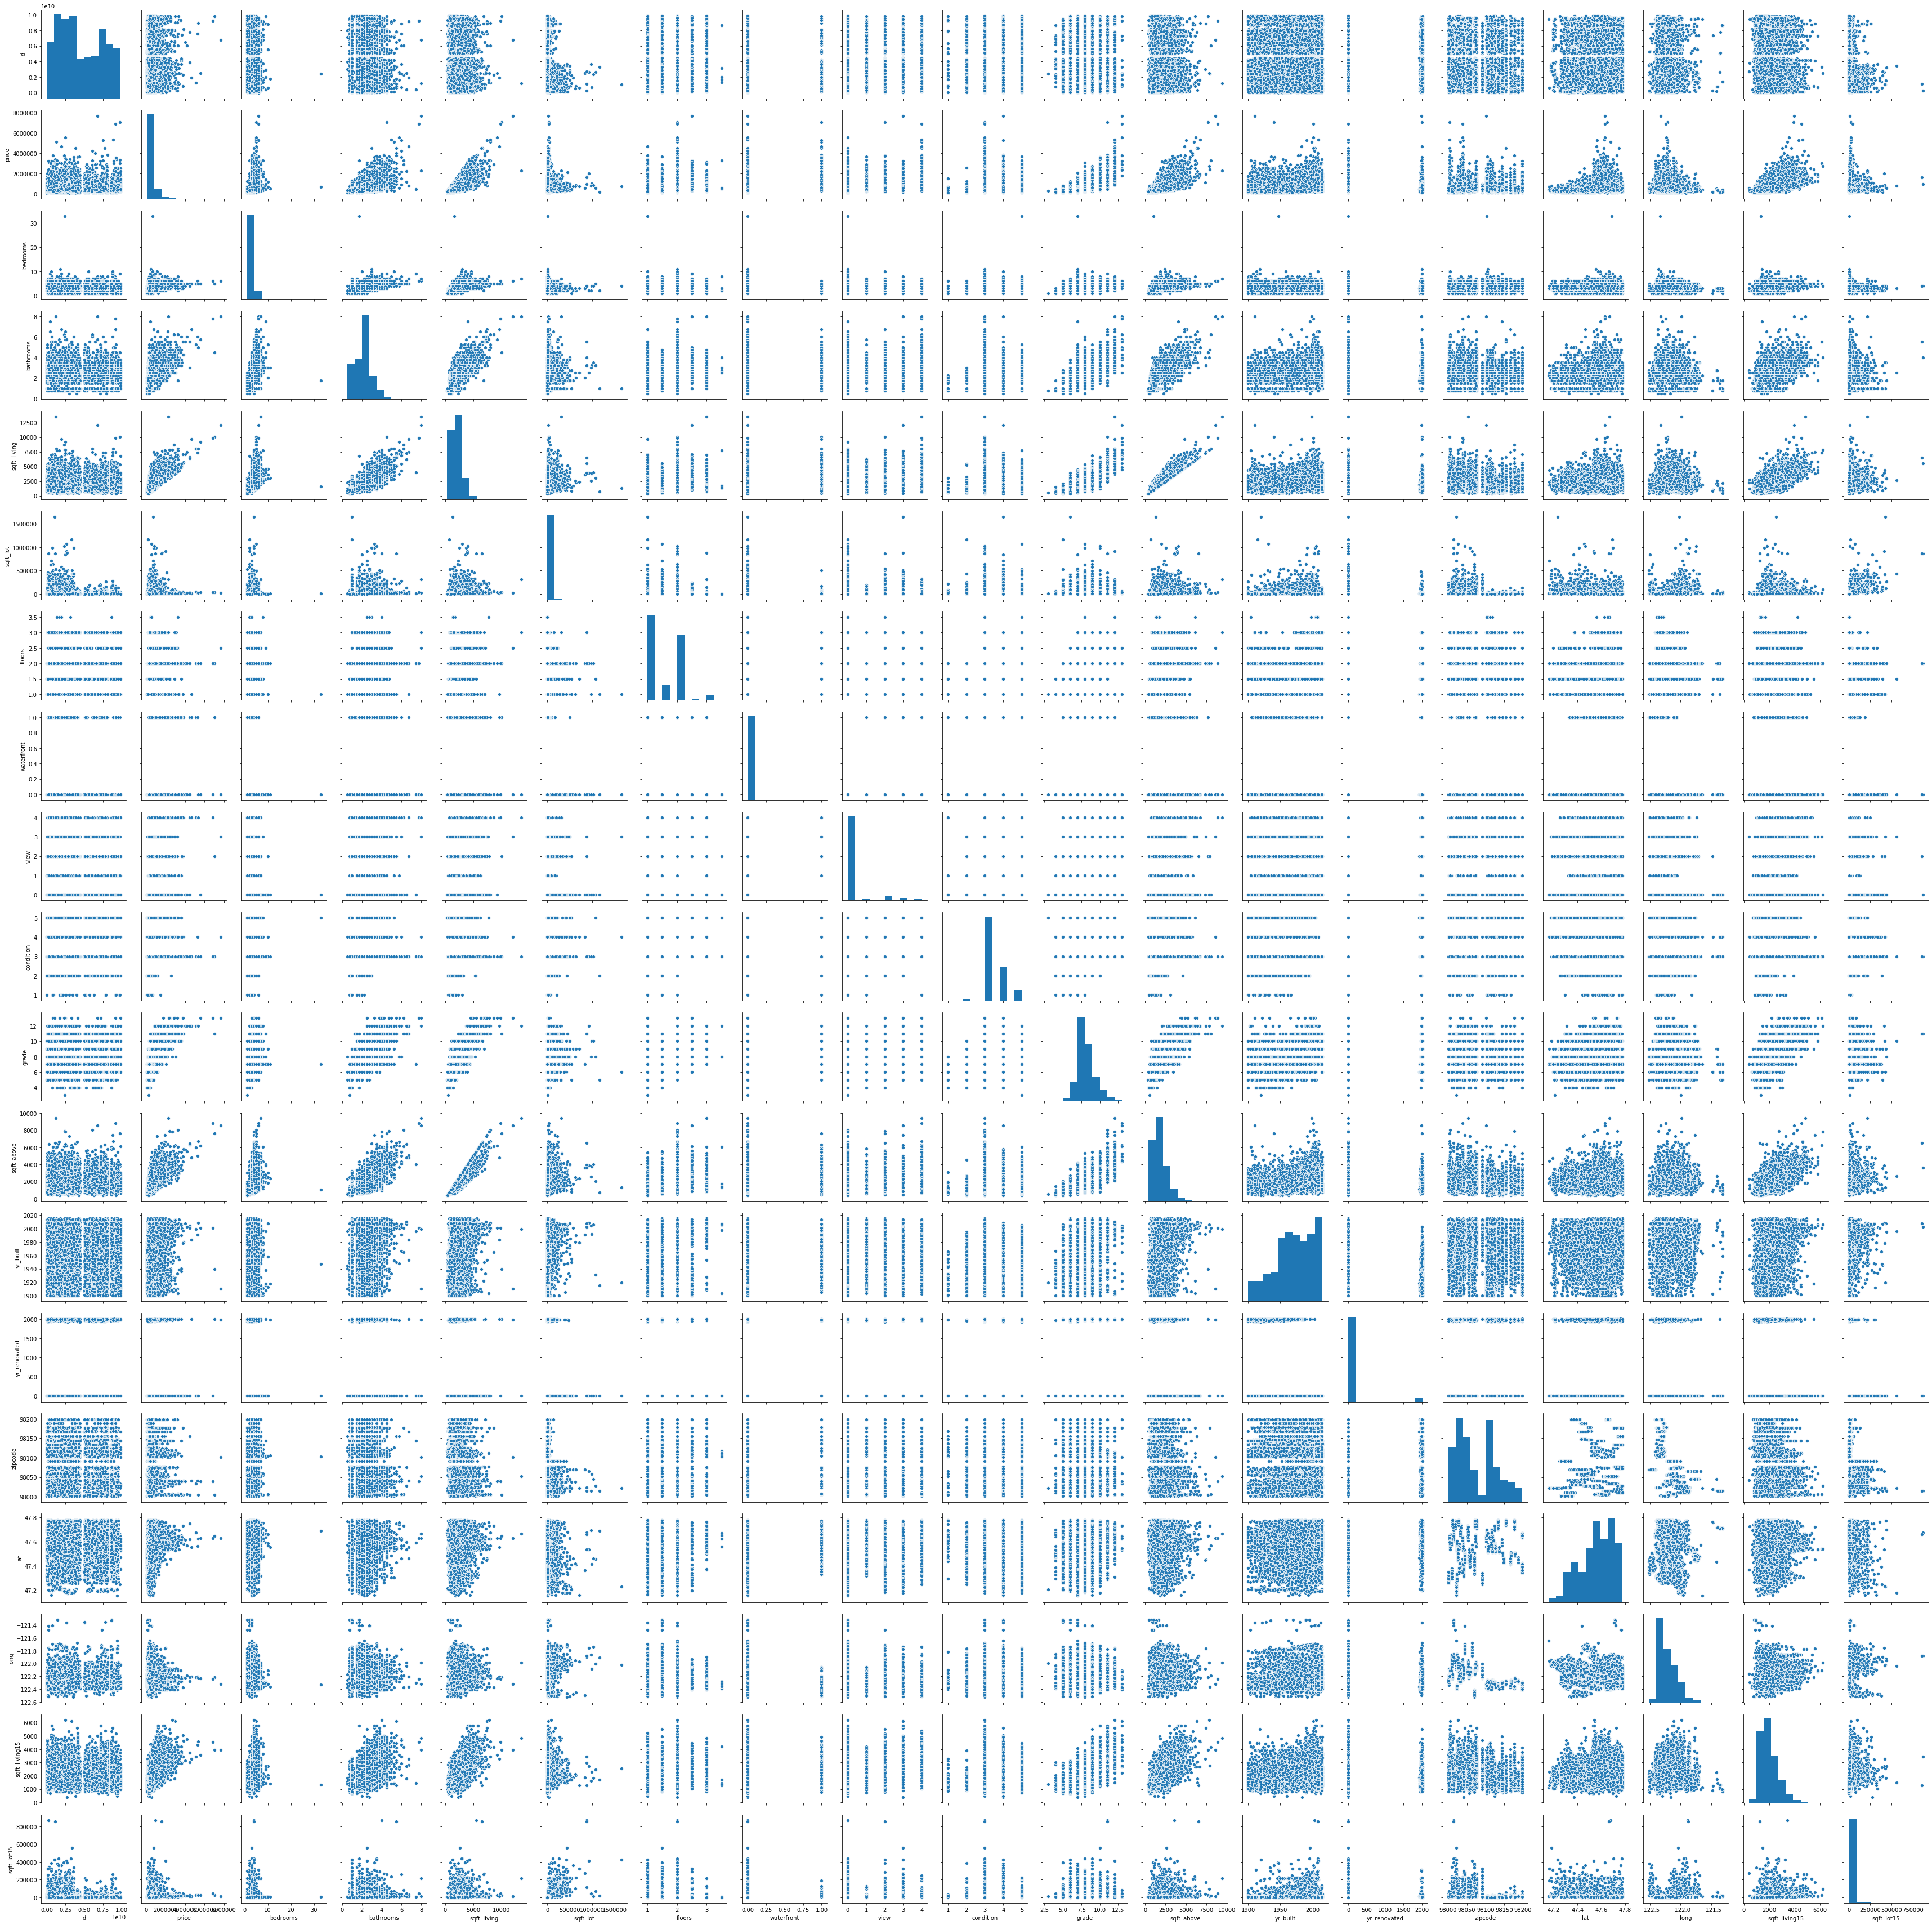

In [7]:
sns.pairplot(df)

Checking for null values.

In [8]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [9]:
df.waterfront.unique()

array([nan,  0.,  1.])

In [10]:
df.yr_renovated.unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [11]:
df.yr_renovated.value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [12]:
df.view.unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [13]:
df.view.value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [14]:
df[df.bedrooms > 5]

id        date      price  bedrooms  bathrooms  sqft_living  \
209    6300000550   7/17/2014   464000.0         6       3.00         2300   
232    9264902050  11/21/2014   315000.0         6       2.75         2940   
239    5152100060   5/29/2014   472000.0         6       2.50         4410   
331    2946001550   4/16/2015   279000.0         6       1.75         2240   
486    9286000240   7/11/2014  1070000.0         6       3.50         4860   
...           ...         ...        ...       ...        ...          ...   
20968  2149800278  10/15/2014   343000.0         6       5.00         2732   
21069  4449800480   3/18/2015   677790.0         6       3.00         2800   
21170  7896300592   1/14/2015   303500.0         6       4.50         3390   
21359  6061500100   7/17/2014  1170000.0         6       3.50         4310   
21506   603000555    3/2/2015   462500.0         6       3.00         2390   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
209        3404     2.0         0.0   0.0  ...      7        1600   
232        7350     1.0         0.0   0.0  ...      8        1780   
239       14034     1.0         0.0   2.0  ...      9        2350   
331       11180     2.0         0.0   0.0  ...      7        2240   
486       11793     2.0         0.0   0.0  ...     11        3860   
...         ...     ...         ...   ...  ...    ...         ...   
20968      7655     2.0         0.0   0.0  ...      7        2732   
21069      4213     2.0         NaN   0.0  ...      8        2800   
21170      7200     2.0         0.0   0.0  ...      8        2440   
21359      7760     2.0         0.0   0.0  ...     10        3260   
21506      4000     2.0         0.0   0.0  ...      7        2390   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
209            700.0     1920        1994.0    98133  47.7067 -122.343   
232           1160.0     1978           0.0    98023  47.3103 -122.339   
239           2060.0     1965           0.0    98003  47.3376 -122.324   
331              0.0     1955           0.0    98198  47.4200 -122.323   
486           1000.0     1998           0.0    98006  47.5521 -122.137   
...              ...      ...           ...      ...      ...      ...   
20968            0.0     2009           0.0    98002  47.3045 -122.211   
21069            0.0     1998           0.0    98117  47.6892 -122.389   
21170          950.0     2007           0.0    98118  47.5205 -122.288   
21359         1050.0     2013           0.0    98059  47.5297 -122.155   
21506            0.0     2014           0.0    98118  47.5173 -122.286   

       sqft_living15  sqft_lot15  
209             1560        1312  
232             2120        8236  
239             2600       13988  
331             1590        7955  
486             3600       11793  
...              ...         ...  
20968           3078       69993  
21069           1440        3960  
21170           2040        7214  
21359           4620       10217  
21506           1680        5000  

[334 rows x 21 columns]

In [20]:
df.sqft_basement.unique()

array(['0.0', '400.0', '910.0', '1530.0', 0, '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', '6

In [16]:
df.loc[df.sqft_basement == "?", 'sqft_basement'] = 0

In [21]:
df.sqft_basement = df.sqft_basement.astype(float)

In [23]:
df.date = pd.to_datetime(df.date)

In [27]:
df.date.sort_values()

7316    2014-05-02
20586   2014-05-02
1040    2014-05-02
20543   2014-05-02
9587    2014-05-02
           ...    
19381   2015-05-14
12623   2015-05-14
5632    2015-05-15
13040   2015-05-24
16580   2015-05-27
Name: date, Length: 21597, dtype: datetime64[ns]

## Classifying Features as Numeric or Categorical

In [26]:
categoricals = []
numeric = []
other = []

split = 10


for col in list(df.columns):
    if df[col].dtype == 'int64' or df[col].dtype == 'float64':
        if len(df[col].unique()) < split:
            categoricals.append(col)
        else:
            numeric.append(col)
    else:
        if len(df[col].unique()) < split:
            categoricals.append(col)
        else:
            other.append(col)
            
print('Categoricals:', categoricals)
print('Numeric:', numeric)
print('Other:', other)

Categoricals: ['floors', 'waterfront', 'view', 'condition']
Numeric: ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
Other: ['date']


# Cleanup Process



* floors are ok 
* waterfront should be dropped.
* view needs to be filled. the nans should be filled in with the median or mode. only 63 missing values.
* condition is ok
* id should be dropped
* price should be set as target
* rows with bedrooms above 5 are dropped 
* bathrooms are ok
* squarefeet columns are ok
* grade is ok
* yr_built is ok
* yr_renovated could be binned, (renovated or not), bin the ones that are renovated based on how recent the renovation was.
* keep coordinates and zipcode
* change date into month and year

### Filling in view

In [28]:
idx = df['view'].isna()

In [29]:
df.view.median()

0.0

In [30]:
df.loc[idx, 'view'] = df.view.median()

In [31]:
df.view.isna().sum()

0

### Dropping houses above 5 bedrooms

In [32]:
idx = df[df.bedrooms > 5]

In [33]:
df = df.drop(idx.index)

In [34]:
len(df)

21263

In [35]:
df.bedrooms.isna().sum()

0

### Binning yr_renovated

In [36]:
idx = df.yr_renovated.isna()

In [38]:
df.loc[idx, 'yr_renovated']  = 0

In [41]:
idx = df.yr_renovated != 0
df.loc[idx, 'yr_renovated'] = pd.qcut(df[idx].yr_renovated, 5, range(1,6)).astype(int)
df.yr_renovated.value_counts()

0.0    20546
2.0      152
4.0      146
1.0      145
3.0      142
5.0      132
Name: yr_renovated, dtype: int64

In [40]:
df[idx].yr_renovated

1        1991.0
35       2002.0
95       1991.0
103      2010.0
125      1992.0
          ...  
19602    2004.0
20041    2006.0
20428    2009.0
20431    2014.0
20946    2007.0
Name: yr_renovated, Length: 717, dtype: float64

Changing date to year and month

In [72]:
df['year'] = df.date.dt.year

In [73]:
df['month'] = df.date.dt.month

In [75]:
df = df.drop(columns = ['date', 'waterfront', 'id'])

# Transformations

Trying log and boxcox transforms on multiple plots

In [76]:
import scipy.stats as stats
import gc

In [77]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

In [78]:
cols = [ 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year', 'month']

C:\Users\anupj\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


55

<Figure size 432x288 with 0 Axes>

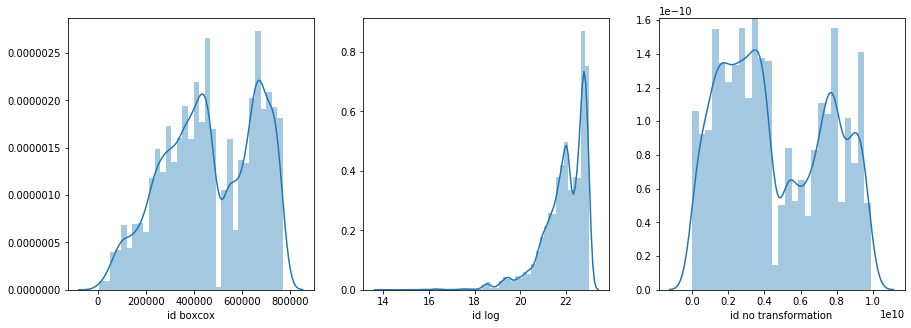

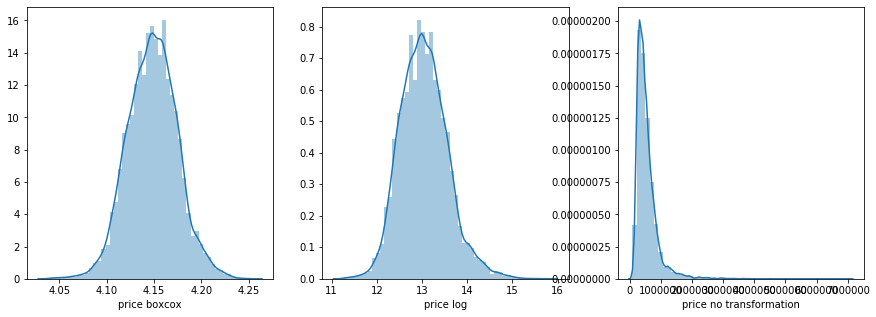

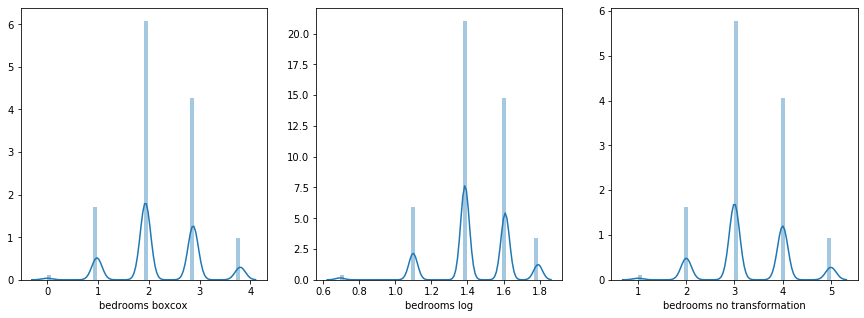

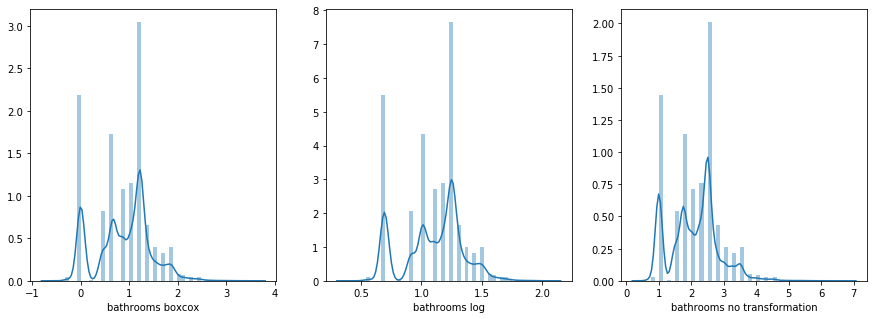

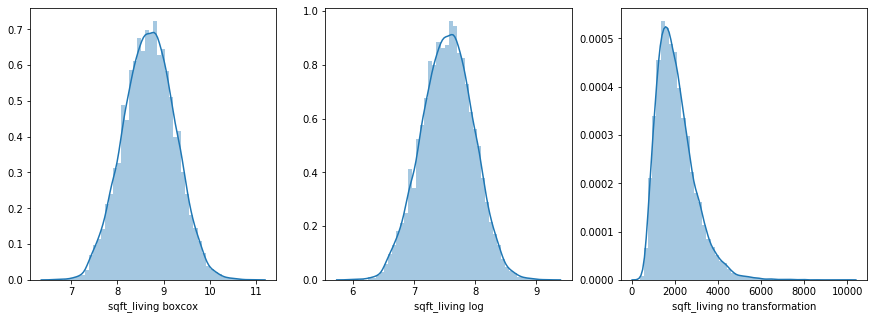

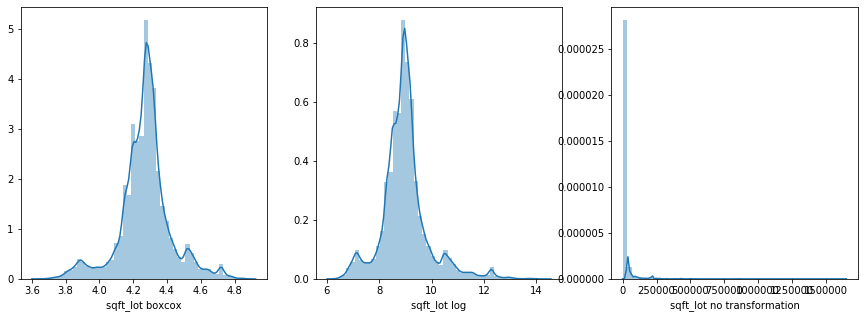

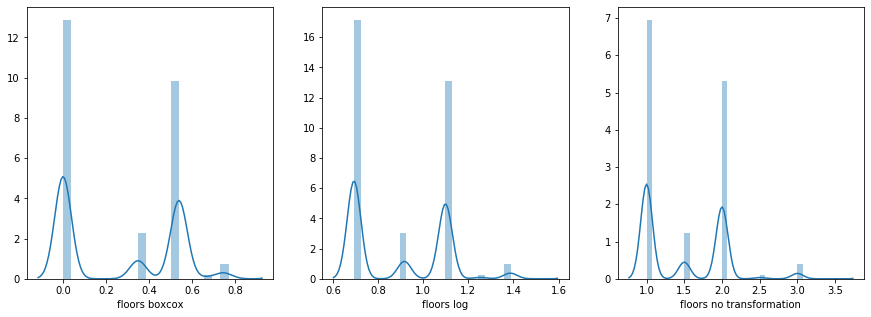

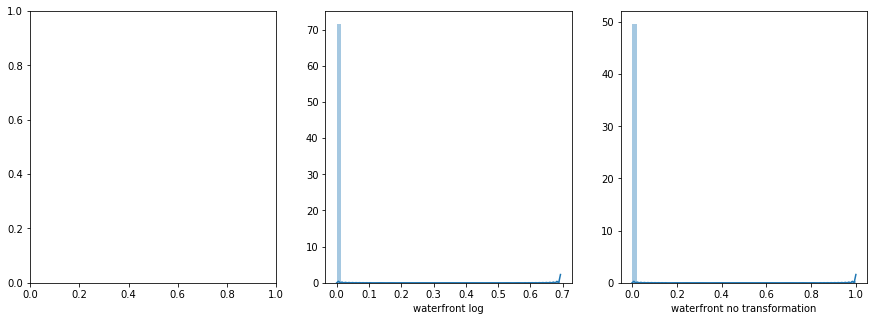

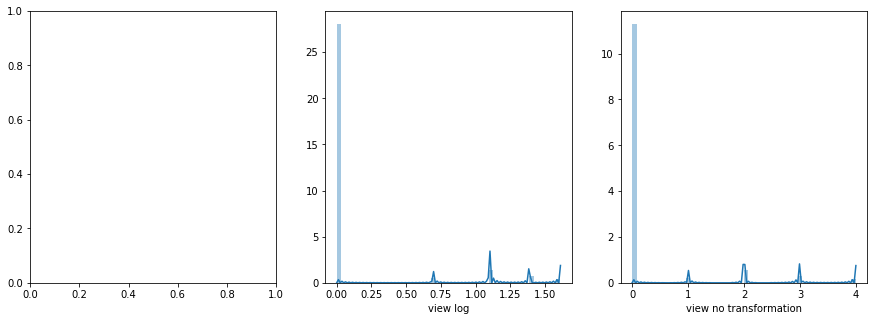

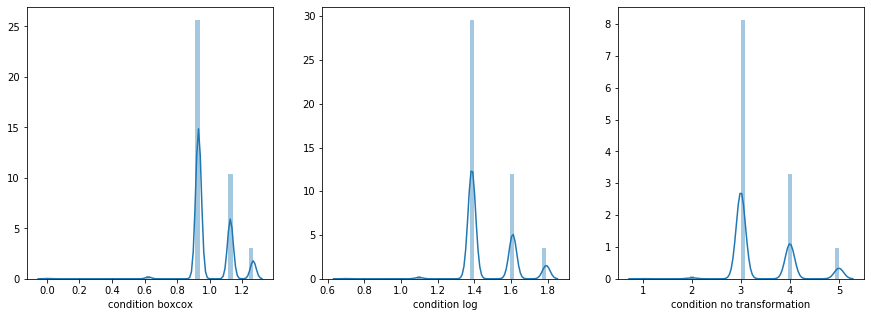

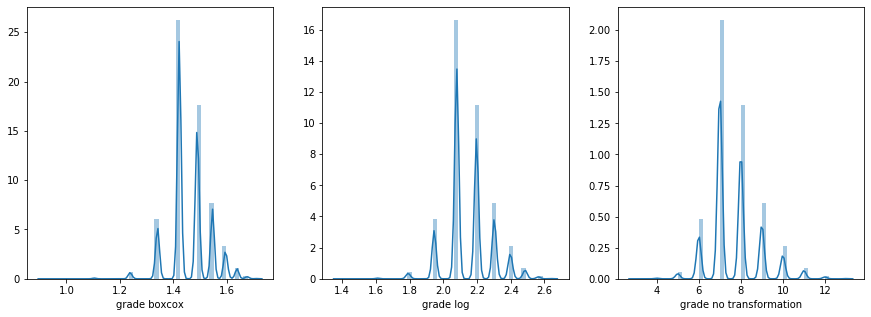

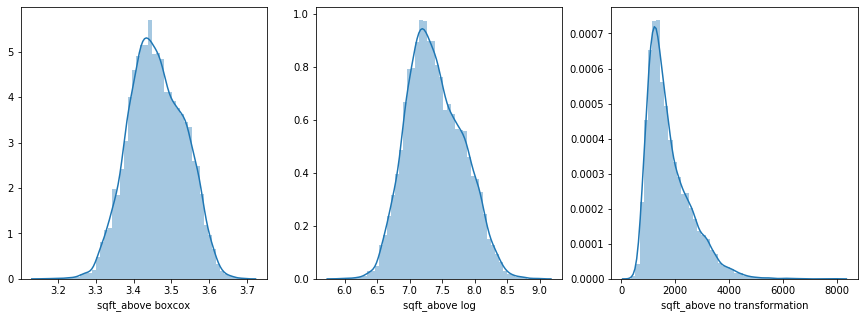

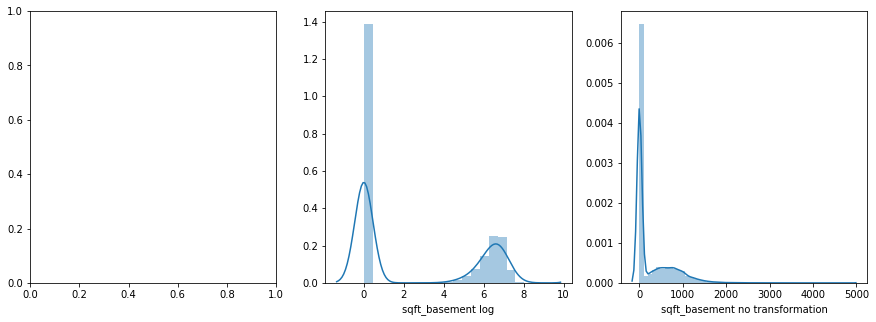

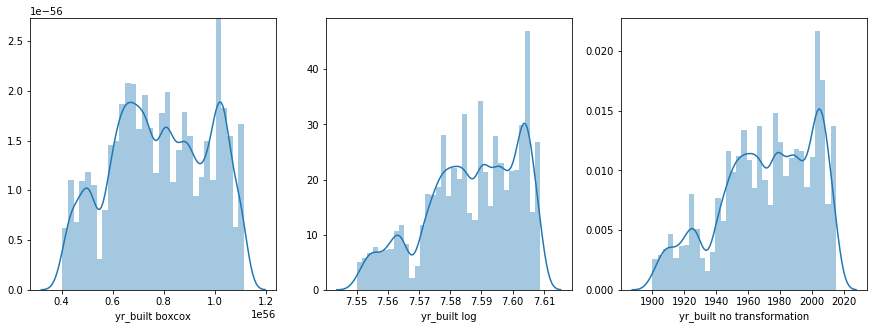

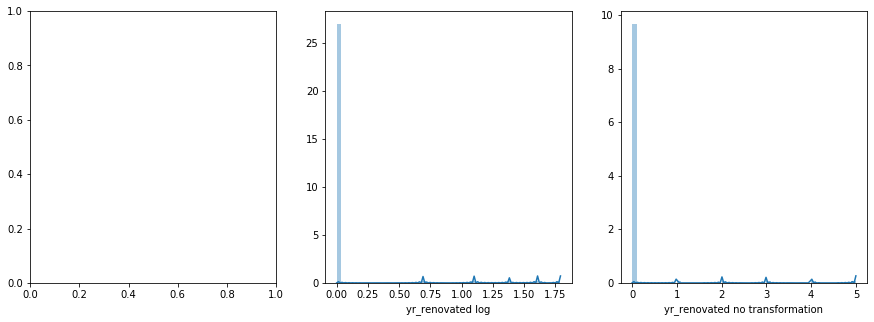

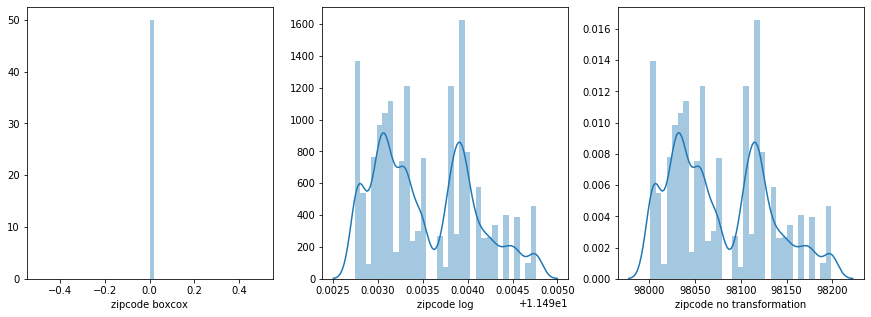

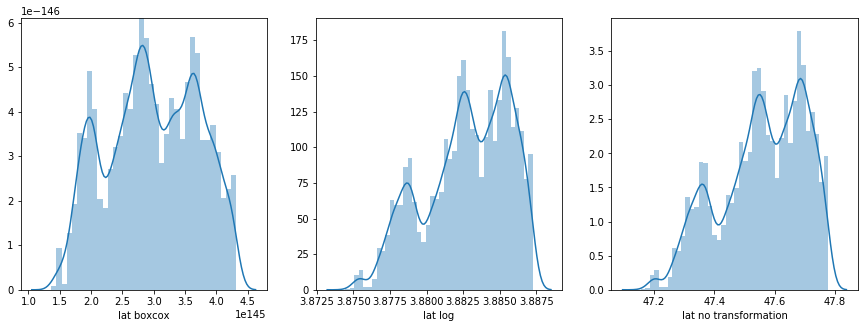

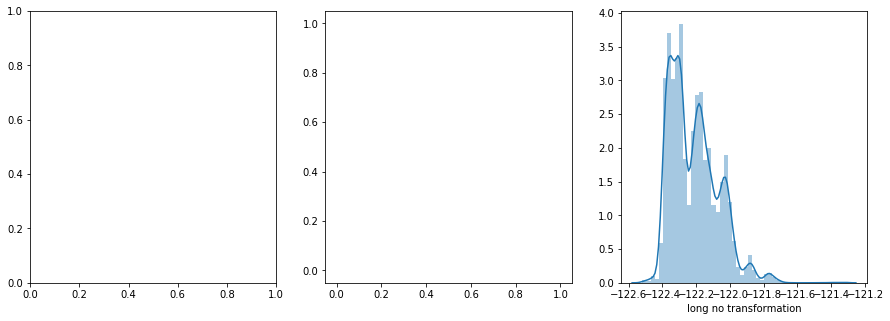

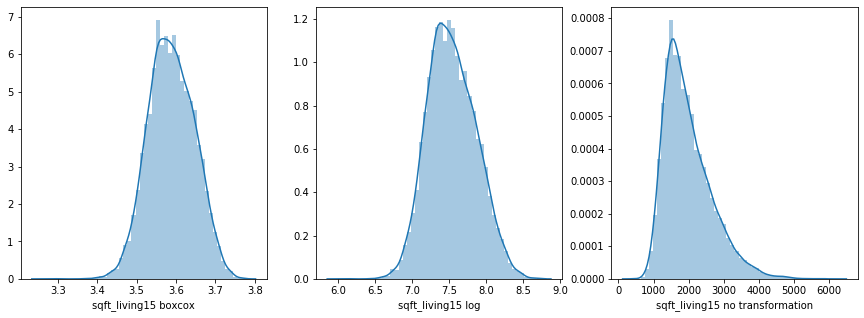

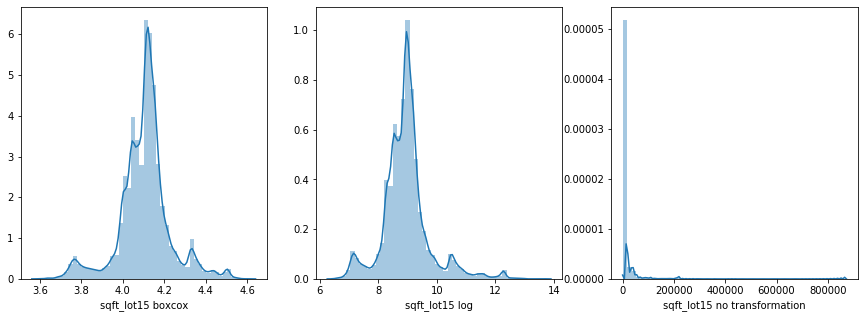

In [79]:
for index, col in enumerate(cols):
    plt.figure(index)
    f, axes =plt.subplots(1, 3, figsize=(15, 5))
    try:
        sns.distplot(stats.boxcox(df[col])[0], axlabel = col + ' boxcox', ax = axes[0])
        sns.distplot(np.log1p(df[col]), axlabel = col + ' log', ax = axes[1])
        sns.distplot(df[col], axlabel = col + ' no transformation', ax = axes[2])
    except:
        try:
            sns.distplot(np.log1p(df[col]), axlabel = col + ' log', ax = axes[1])
            sns.distplot(df[col], axlabel = col + ' no transformation', ax = axes[2])
        except:
            sns.distplot(df[col], axlabel = col + ' no transformation', ax = axes[2])
gc.collect()

Based on these plots it was determined that we should

* log and scale the price, sqft_living, sqft_living, sqft_above
* boxcox and scale sqft_lot, yr_built, sqft_lot15
* scale bedrooms, bathrooms,  lat, long, sqft_basement, condition, grade, floors, zipcode, yr_renovated, view

In [82]:
from sklearn.preprocessing import minmax_scale

In [80]:
log_n_scale = ['sqft_living', 'sqft_living15', 'sqft_above']
boxcox_n_scale = ['yr_built', 'sqft_lot15','sqft_lot']
scale = ['bedrooms', 'bathrooms',  'lat', 'long', 'condition', 'grade', 'floors', 'zipcode', 'yr_renovated', 'view', 'sqft_basement', 'month']

transforms = [log_n_scale, boxcox_n_scale, scale]

In [83]:
for transform in transforms:
        for col in transform:
            if transform == log_n_scale:
                df[col] = np.log1p(df[col])
                
            elif transform == boxcox_n_scale:
                df[col] = stats.boxcox(df[col])[0]
                
            df[col] = minmax_scale(df[col])

df.head()

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7129300520  221900.0      0.50       0.08     0.396981  0.466447     0.0   
1  6414100192  538000.0      0.50       0.28     0.632881  0.503833     0.4   
2  5631500400  180000.0      0.25       0.08     0.257829  0.549846     0.0   
3  2487200875  604000.0      0.75       0.40     0.553190  0.447377     0.0   
4  1954400510  510000.0      0.50       0.24     0.506729  0.519766     0.0   

   waterfront  view  condition  ...  sqft_basement  yr_built  yr_renovated  \
0         NaN   0.0        0.5  ...       0.000000  0.361635           0.0   
1         0.0   0.0        0.5  ...       0.082988  0.329309           0.4   
2         0.0   0.0        0.5  ...       0.000000  0.196551           0.0   
3         0.0   0.0        1.0  ...       0.188797  0.447334           0.0   
4         0.0   0.0        0.5  ...       0.000000  0.662874           0.0   

    zipcode       lat      long  sqft_living15  sqft_lot15  year     month  
0  0.893939  0.571498  0.217608       0.441078    0.462941  2014  0.818182  
1  0.626263  0.908959  0.166113       0.525634    0.512823  2014  1.000000  
2  0.136364  0.936143  0.237542       0.699074    0.521418  2015  0.090909  
3  0.681818  0.586939  0.104651       0.446476    0.441839  2014  1.000000  
4  0.368687  0.741354  0.393688       0.548613    0.509937  2015  0.090909  

[5 rows x 22 columns]

Price is left untouched as the GAM model logs the target.

In [84]:
df['year'] = df.year - 2010

In [86]:
df.head()

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7129300520  221900.0      0.50       0.08     0.396981  0.466447     0.0   
1  6414100192  538000.0      0.50       0.28     0.632881  0.503833     0.4   
2  5631500400  180000.0      0.25       0.08     0.257829  0.549846     0.0   
3  2487200875  604000.0      0.75       0.40     0.553190  0.447377     0.0   
4  1954400510  510000.0      0.50       0.24     0.506729  0.519766     0.0   

   waterfront  view  condition  ...  sqft_basement  yr_built  yr_renovated  \
0         NaN   0.0        0.5  ...       0.000000  0.361635           0.0   
1         0.0   0.0        0.5  ...       0.082988  0.329309           0.4   
2         0.0   0.0        0.5  ...       0.000000  0.196551           0.0   
3         0.0   0.0        1.0  ...       0.188797  0.447334           0.0   
4         0.0   0.0        0.5  ...       0.000000  0.662874           0.0   

    zipcode       lat      long  sqft_living15  sqft_lot15  year     month  
0  0.893939  0.571498  0.217608       0.441078    0.462941     4  0.818182  
1  0.626263  0.908959  0.166113       0.525634    0.512823     4  1.000000  
2  0.136364  0.936143  0.237542       0.699074    0.521418     5  0.090909  
3  0.681818  0.586939  0.104651       0.446476    0.441839     4  1.000000  
4  0.368687  0.741354  0.393688       0.548613    0.509937     5  0.090909  

[5 rows x 22 columns]

Exporting to csv

In [ ]:
#df.to_csv('Cleaned_Housing_Data_v4.csv', index = False)